In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")


# Loading the data
# Dataframe
path_df = "/Users/mac/Desktop/DSS_ML/ToolsAbstrcts_4Classes_40/Tools-abstract/Pickles/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)
    
# features
path_features = "/Users/mac/Desktop/DSS_ML/ToolsAbstrcts_4Classes_40/Tools-abstract/Pickles/features.pickle"
with open(path_features, 'rb') as data:
    features = pickle.load(data)
    

# features_train
path_features_train = "/Users/mac/Desktop/DSS_ML/ToolsAbstrcts_4Classes_40/Tools-abstract/Pickles/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "/Users/mac/Desktop/DSS_ML/ToolsAbstrcts_4Classes_40/Tools-abstract/Pickles/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "/Users/mac/Desktop/DSS_ML/ToolsAbstrcts_4Classes_40/Tools-abstract/Pickles/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "/Users/mac/Desktop/DSS_ML/ToolsAbstrcts_4Classes_40/Tools-abstract/Pickles/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [2]:
# Cross-Validation for Hyperparameter tuning

# In the case of the Multinomial Naïve Bayes, we will not tune any hyperparameter.
mnbc = MultinomialNB()
mnbc


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [3]:
# fitting the model to training data:


mnbc.fit(features_train, labels_train)

mnbc_pred = mnbc.predict(features_test)


Training Accuracy: 0.49 (+/- 0.09)
Test Accuracy: 0.40 (+/- 0.18)
Training Accuracy: 0.60 (+/- 0.14)
Test Accuracy: 0.52 (+/- 0.13)
Training Accuracy: 0.45 (+/- 0.10)
Test Accuracy: 0.38 (+/- 0.13)
Training Accuracy: 0.58 (+/- 0.19)
Test Accuracy: 0.33 (+/- 0.13)
####################################################################################################
Accuracy on training set: 0.58 (+/- 0.19)


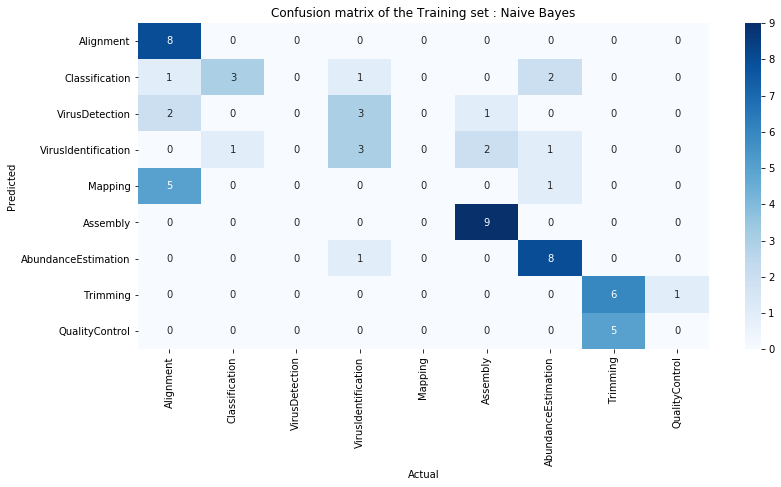

Accuracy on test set: 0.33 (+/- 0.13)


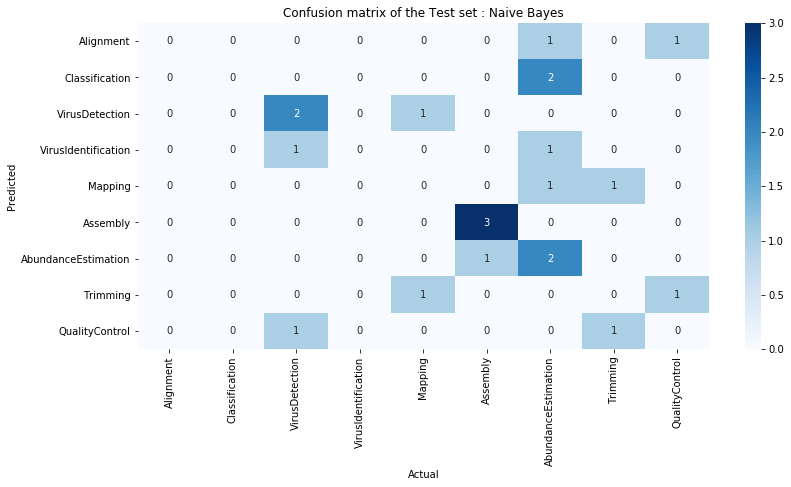

Accuracy on wole data set: 0.51 (+/- 0.14)


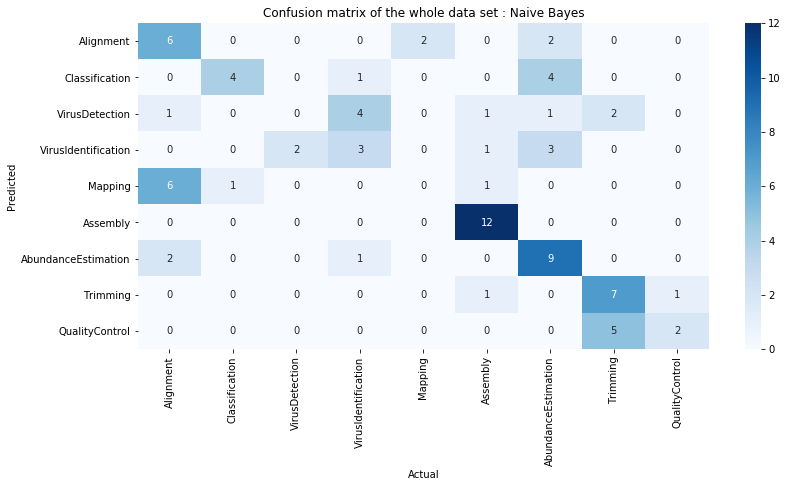

In [4]:
# Stratified cross validation

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

labels = df['Category_Code']



# stratified 4 fold crosss validation

skf = StratifiedKFold(n_splits=4, random_state=2, shuffle=True)
skf.get_n_splits(features)
for train_index, test_index in skf.split(features, labels):

    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    mnbc_fit = mnbc.fit(X_train, y_train)
    mnbc_pred = mnbc.predict(X_test)
    #confidence interval training set
    scores = cross_val_score(mnbc_fit, X_train, y_train, cv=3, scoring='accuracy')
    print("Training Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

     #confidence interval test set
    scores = cross_val_score(mnbc_fit, X_test, y_test, cv=3, scoring='accuracy')
    print("Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



# Training set performance
#confidence interval 
scores = cross_val_score(mnbc_fit, X_train, y_train, cv=3, scoring='accuracy')
print("Accuracy on training set: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# confusion matrix
y_pred = cross_val_predict(mnbc_fit, X_train, y_train, cv=3)
conf_mat = confusion_matrix(y_train, y_pred)
# plot the confusion matrix
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = conf_mat
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix of the Training set : Naive Bayes')
plt.show()



# Test set performance
#confidence interval 
scores = cross_val_score(mnbc_fit, X_test, y_test, cv=3, scoring='accuracy')
print("Accuracy on test set: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# cross validation confusion matrix
y_pred = cross_val_predict(mnbc_fit, X_test, y_test, cv=3)
conf_mat = confusion_matrix(y_test, y_pred)
# plot the confusion matrix
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = conf_mat
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix of the Test set : Naive Bayes')
plt.show()


# whole data set performance
#confidence interval 
scores = cross_val_score(mnbc_fit, features, labels, cv=3, scoring='accuracy')
print("Accuracy on wole data set: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# confusion matrix
y_pred = cross_val_predict(mnbc_fit, features, labels, cv=3)
conf_mat = confusion_matrix(labels, y_pred)
# plot the confusion matrix
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = conf_mat
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix of the whole data set : Naive Bayes')
plt.show()






In [5]:
# checking if the hyperparameter tuning process has returned a better model
# base model
base_model = MultinomialNB()
scores_base = cross_val_score(base_model, X_train, y_train, cv=3, scoring='accuracy')
print("base model accuracy: %0.2f (+/- %0.2f)" % (scores_base.mean(), scores_base.std() * 2))
# tuned model
scores_tuned = cross_val_score(mnbc_fit, X_train, y_train, cv=3, scoring='accuracy')
print("tuned model accuracy: %0.2f (+/- %0.2f)" % (scores_tuned.mean(), scores_tuned.std() * 2))


base model accuracy: 0.58 (+/- 0.19)
tuned model accuracy: 0.58 (+/- 0.19)
